In [44]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
cell_df["Class"] = cell_df["Class"].replace([2],0)
cell_df["Class"] = cell_df["Class"].replace([4],1)
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


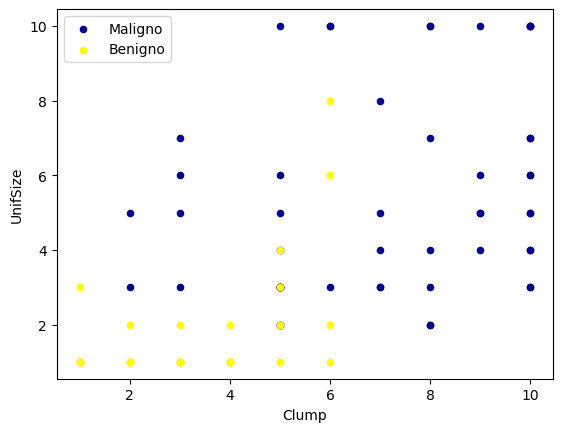

In [4]:
ax= cell_df[cell_df["Class"]==1][0:50].plot(kind="scatter",x="Clump",y="UnifSize",color="DarkBlue",label="Maligno")
ax= cell_df[cell_df["Class"]==0][0:50].plot(kind="scatter",x="Clump",y="UnifSize",color="Yellow",label="Benigno",ax=ax)
plt.show()

In [5]:
#Preprocesamiento de datos y seleccion
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [6]:
#Eliminar renglones no numericos
cell_df = cell_df[pd.to_numeric(cell_df["BareNuc"],errors="coerce").notnull()]
cell_df["BareNuc"] = cell_df["BareNuc"].astype("int")
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [7]:
feaure_df = cell_df[["Clump","UnifSize","UnifShape","MargAdh","SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit"]]
x=np.asarray(feaure_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [8]:
cell_df["Class"] = cell_df["Class"].astype("int")
y= np.asarray(cell_df["Class"])
y[0:5]

array([0, 0, 0, 0, 0])

In [9]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=4)
print("Grupo de entrenamiento", x_train.shape)
print("Grupo de prueba",x_test.shape, y_test.shape)

Grupo de entrenamiento (546, 9)
Grupo de prueba (137, 9) (137,)


#Modelación con SVM
Linear
Polinomial
Radial Basic function
Sigmold

In [11]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf")
clf.fit(x_train,y_train)

SVC()

In [12]:
##Predicción para la base de pruebas
yhat = clf.predict(x_test)
yhat[0:5]

array([0, 1, 0, 1, 0])

In [16]:
#Creación matriz de confusión
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x)
cm = confusion_matrix(y_test,yhat)
cm

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [23]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1])

In [28]:
yhat

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1])

In [30]:
z=y_test - yhat
z

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

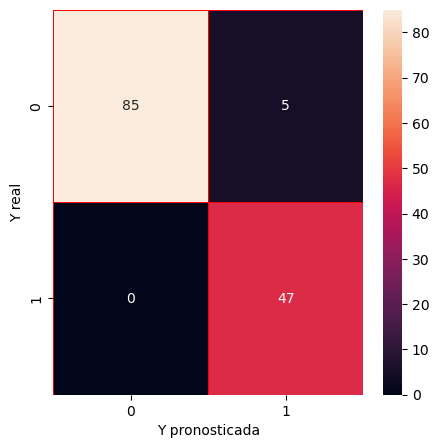

In [42]:
#Visualizar matriz de confusión
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Y pronosticada")
plt.ylabel("Y real")
plt.show()

In [50]:
#Interpretación de estadisticas de desempeño
cnf_matrix = confusion_matrix(y_test,yhat,labels=[0,1])
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        90
           1       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



Determinación de Niveles de Precisión
Presición = Porcentaje de predicciones correctas relativas al total de predicciones
El total se calcula por columna
Que porcentaje de las veces que hacemos u pronostico es correcto?

In [58]:
PresicionBenigno = cm[0,0] / (cm[0,0] + cm[1,0])
PresicionBenigno

1.0

In [62]:
PresicionMaligno = cm[1,1] / (cm[1,1] + cm[0,1])
PresicionMaligno

0.9038461538461539

Determinación de niveles de Recuperación (Recall)
La recuperación recall es el porcentaje de predicciones correctas relativas al total de valores reales
El total se calcula por renglon
Que porcentaje de las veces que se tiene un valor es capaz de identificarlo?

In [65]:
RecallBenigno = cm[0,0] / (cm[0,0] + cm[0,1])
RecallBenigno

0.9444444444444444

In [70]:
RecallMaligno = cm[1,1] / (cm[1,1] + cm[1,0])
RecallMaligno

1.0

Determinación Score F1
F1 Score = Media armonica ponderada de la precision y la recuperación. Cuanto más se acerque a 1, mejor será el módelo
F1 Score = 2 * (Precision * Recall)/(Precision + Recall)

In [75]:
F1Benigno = 2* (PresicionBenigno*RecallBenigno) / (PresicionBenigno+RecallBenigno)
F1Benigno

0.9714285714285714

In [77]:
F1Maligno = 2* (PresicionMaligno*RecallMaligno) / (PresicionMaligno+RecallMaligno)
F1Maligno

1.0

Determinación de soportes
Soporte= Numero de observaciones que pertenecen en forma a cada clase posible (Total por renglón

In [79]:
SoporteBenigno= cm[0,0]+ cm[0,1]
SoporteBenigno

90

In [81]:
SoporteMaligno= cm[1,0]+ cm[1,1]
SoporteMaligno

47

Determinación de la Precisión Global
Accuracy = Porcentaje de predicciones correctas

In [83]:
Correctos= cm[0,0]+ cm[1,1]
Incorrectos= cm[0,1]+ cm[1,0]
PrecisionGlobal= Correctos / (Correctos + Incorrectos)
PrecisionGlobal

0.9635036496350365

Promedios simples por indicador (Macro Average)
Promedios simples por precisión, recuperación y F1 Score

In [87]:
MacroAvgPrecision = (PresicionBenigno + PresicionMaligno)/2
MacroAvgPrecision

1.0

In [89]:
MacroAvgRecall = (RecallBenigno + RecallMaligno)/2
MacroAvgRecall

0.9722222222222222

In [93]:
MacroF1Score = (F1Benigno + F1Maligno)/2
MacroF1Score

0.9857142857142858

Promedios ponderados por indicador (Weighted Average)
Promedios ponderados de acuerdo a soportes por indicador

In [99]:
PesoBenigno = SoporteBenigno / (SoporteBenigno + SoporteMaligno)
PesoMaligno = SoporteMaligno / (SoporteBenigno + SoporteMaligno)

In [101]:
WAvgPrecision= PresicionBenigno * PesoBenigno + PresicionMaligno * PesoMaligno
WAvgPrecision

1.0

In [103]:
WAvgRecall= RecallBenigno * PesoBenigno + RecallMaligno * PesoMaligno
WAvgRecall

0.9635036496350364

In [105]:
WAvgF1Score= F1Benigno * PesoBenigno + F1Maligno * PesoMaligno 
WAvgF1Score

0.9812304483837331

Prueba de SVM con Kernel Lineal

In [107]:
clf = svm.SVC(kernel="linear")
clf.fit(x_train,y_train)

yhat = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x)
cm = confusion_matrix(y_test,yhat)
cm

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [109]:
cnf_matrix = confusion_matrix(y_test,yhat,labels=[0,1])
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        90
           1       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



Prueba de SVM con Kernel Polinomial

In [111]:
clf = svm.SVC(kernel="poly")
clf.fit(x_train,y_train)

yhat = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x)
cm = confusion_matrix(y_test,yhat)
cm

array([[86,  4],
       [ 0, 47]], dtype=int64)

In [113]:
cnf_matrix = confusion_matrix(y_test,yhat,labels=[0,1])
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        90
           1       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



Prueba de SVM con Kernel Sigmoide

In [115]:
clf = svm.SVC(kernel="sigmoid")
clf.fit(x_train,y_train)

yhat = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x)
cm = confusion_matrix(y_test,yhat)
cm

array([[54, 36],
       [47,  0]], dtype=int64)

In [117]:
cnf_matrix = confusion_matrix(y_test,yhat,labels=[0,1])
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.53      0.60      0.57        90
           1       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

